### Image Features
#### Ref
- [OpenCV Image Features](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning)
- [Features](http://aishack.in/tutorials/features/)
#### Notes
- Image feature points or pattern are something which can be easily tracked and compared across images. 
- Matched features/pattern across images can be aligned for usage in applications like Image stitching, 3D reconstruction, etc.
- Broadly feature is small neighbourhood region of image which can be localized and tracked uniquely
- Thus, corner-region is better feature compared to edge-region which is better compared to the flat-region in the image. In short, *Corners are good features to track*
- *Feature detection* - Process to find 'good' features *(unique ones for which corresponding points can be detrmined in other images)* or specifically, the corner features. For example, point where we get maximum change when moved in any direction.
- *Feature description* - Quantitative description of region/neighbourhood around the feature point.
- We can determine **features** and their **desciptors** in images to **match/align** them and stepping sone for *stitching, registration, motion tracking, mosaicing, streo-vsion, SFM, 3D modelling and reconstruction/Triangulation to determine 3D point from 2D image-point, image retrieval etc*.
    

### Harris Corner detection
#### Ref
- [OpenCV Harris Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)
- [Wikipedia](https://en.wikipedia.org/wiki/Harris_Corner_Detector)
#### Notes
- **Corners are the region with large variation in intensity in all the direction**, thus constitute good class of features, and algorthims have been developed to detect them.
- **These are good *interest points* which are invariant under detection algorithm to rotation, translation and illumination change**
- harris corner detection method is simple mathematical analysis of image to check for points with maximum change in intensity in all directions.
![Equation](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/1948f2850c912ce3394b61ba99b546f1bf7a6adc.png "HCD equation")
- mathematical steps, equations and workflow can be referred in the reference links.
- Terms - Eigenvalues, structure matrix, Hessian matrix etc.
- Result of HCD is a *grayscale image of corner scores, which we can threshold* to get corner points in the image. **Corners in the image can be found as the local maxima of this response map.**
- In openCV, HCD performed using `cv2.cornerHarris()` method.

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

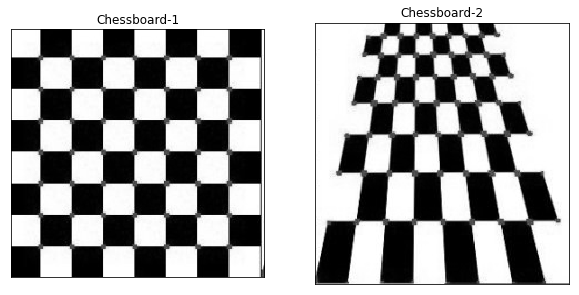

In [60]:
# Read chessboard images and diplay them
dir_ = '/home/cognitifai/Pictures/opencv/'
file1_ = 'chessboard_1.png'
file2_ = 'chessboard_2.png'

img1 = cv2.imread(os.path.join(dir_,file1_))
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(os.path.join(dir_,file2_))
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img1_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-1')
plt.subplot(122) , plt.imshow(img2_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-2')
plt.show()

In [61]:
# use HCD method for corner detection
img1_gray = np.float32(img1_gray)  # cv2.cornerHarris() takes input image as floating-point grayscale
img2_gray = np.float32(img2_gray)  # cv2.cornerHarris() takes input image as floating-point grayscale

img1_hcd = cv2.cornerHarris(img1_gray, 2, 3, 0.04)
img2_hcd = cv2.cornerHarris(img2_gray, 2, 3, 0.04)

# Dilate corner points to fill gaps 
STR_ELEMENT = None
img1_hcd_morph = cv2.dilate(img1_hcd, STR_ELEMENT)
img2_hcd_morph = cv2.dilate(img2_hcd, STR_ELEMENT)

# Mark corner points in the original image by Thresholding HCD response map
img1[img1_hcd_morph > 0.01*img1_hcd_morph.max()] = [255,0,0]
img2[img2_hcd_morph > 0.01*img2_hcd_morph.max()] = [255,0,0]

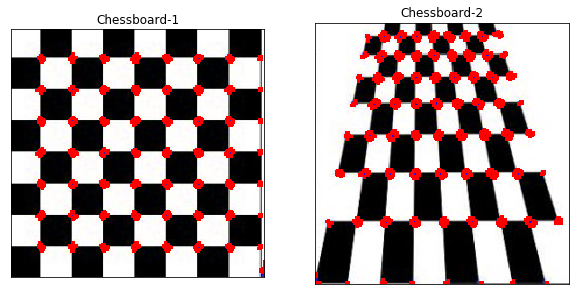

In [62]:
# Finally display the images with corner points marked on them
plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img1,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-1')
plt.subplot(122) , plt.imshow(img2,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-2')
plt.show()

### Subpixels and Corners accuracy refinement upto subpixel level
#### Ref
- [Corner subpixel-accuracy](http://aishack.in/tutorials/subpixel-corners-increasing-accuracy/)
- [Subpixel corners in OpenCV](http://www.aishack.in/tutorials/subpixel-corners-opencv/)
- [OpenCV reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

#### Notes
- In digital images, limit of spatial resolution is pixel, we cannot access information b/w pixels.
- Objects in the image are spatially quantized at pixel resolution, however the true location of object parts like edges, corners may be b/w the pixels, i.e. at non-integer/fractional coordinates (subpixel resolution)
- Thus any localization of object data would be upto pixel resolution of display, but some applications require higher accuracy of localization like in *3D-reconstruction from 2D images, Tracking, camera-caliberation, stereo-vision*
- *Mathematical techniques have been developed to inceease the accuracy of detected/localized object points*
- The subpixel cannot be accessed, but information on exact position is useful in high-level application based on corner-detection, matching etc.
- In OpenCV, there are methods (iterative ones like `cv2.cornerSubPix()` to refine position until stopping criteria - MaxIteration/epsilon change - is reached) to refine the position of corner detected by other functions like HCD, STCD (Shi-Tomasi Corner Detection)


- OpenCV method `cv2.cornerSubPix()` further refines the detected corners (by detection algos) upto sub-pixel accuracy.
- Corners do not lie on a single pixel but constitute bunch of pixels. We pass the centroids of all the corner regions to refinement method.
- Stopping criteria and window size, for searching in neighbourhood, is also to be provided.

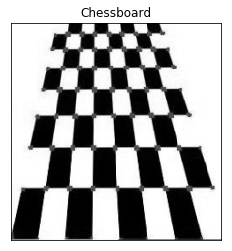

In [99]:
# Read chessboard images and diplay them
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_2.png'

img = cv2.imread(os.path.join(dir_,file_))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.show()

In [100]:
# Find harris corners in the image
img_gray = np.float32(img_gray)

img_gray_hcd = cv2.cornerHarris(img_gray, 2, 3, 0.04)
img_gray_hcd = cv2.dilate(img_gray_hcd,None)

_,img_gray_hcd = cv2.threshold(img_gray_hcd, 0.01*img_gray_hcd.max(), 255, cv2.THRESH_BINARY)
img_gray_hcd = np.uint8(img_gray_hcd) # Input image for connectedComponentsWithStats should be 8-bit

In [101]:
# find centroids of corner regions
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_gray_hcd)

In [102]:
# perform corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)  # define stopping criteria
cornersSubPix = cv2.cornerSubPix(img_gray, np.float32(centroids), (5,5), (-1,-1), criteria)

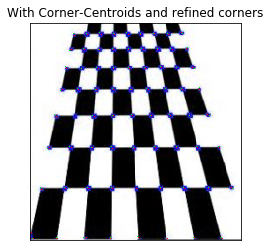

In [103]:
# Draw the centroids and refined corer points on the original image in different colors
centroids_int = np.int0(centroids)
cornersSubPix_int = np.int0(cornersSubPix)

img[centroids_int[:,1],centroids_int[:,0]] = [255,0,0]   # centroids in RED
img[cornersSubPix_int[:,1],cornersSubPix_int[:,0]] = [0,255,0]   # Refined corners in GREEN

plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('With Corner-Centroids and refined corners')
plt.show()

### Shi-Tomasi Corner detection a.k.a. Good Features to track
#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html)

#### Notes
- Shi and Tomasi presented improvement over HCD in their paper *Good Features to Track*
- In STCD, the scoring function is changed as ![Scoring function for Shi-Tomasi Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/1d9c5f834abe53109bc6cfea3557294bb38ba935.png "Scoring function for Shi-Tomasi Corner detection") (In HCD, its ![Scoring function for Harris Corner Detection](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/0a3ea39f0c903da7c210e2912e3c51805597f23a.png "Scoring function for Harris Corner detection")). When `R` is greater than some threshold value, its considered as a corner.
- OpenCV provides `cv2.goodFeaturesToTrack()` which finds `N` strongest corners in a grayscale image, in decreasing order of quality, using Shi-Tomasi (default) or harris CD method. We pass number of corners to be detected, Quality-level of corners (b/w 0-1), minimum euclidean distance b/w corners (Minimum possible Euclidean distance between the returned corners ; function rejects any corner for which a stornger exist at a distance less than min-distance).
- `cv2.goodFeaturesToTrack()` is useful for tracking purpose b/w frames.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

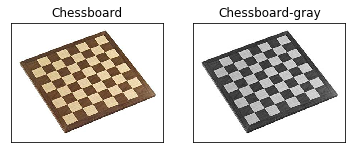

In [2]:
# Read chessboard image and diplay it
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_3.jpg'

img = cv2.imread(os.path.join(dir_,file_))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.subplot(122) , plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-gray')
plt.show()

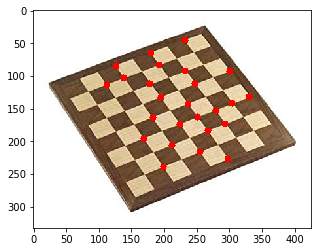

In [25]:
# Find corners and plot on original image
corners = cv2.goodFeaturesToTrack(img_gray, 25, 0.01, 5)
corners = np.int32(corners)

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),5,255,-1)

plt.imshow(img, "gray") ; plt.show()

### SIFT (Scale Invariant Feature Transform)
#### Ref
- [OpenCV reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)
- [Pyramid and scale-space](http://www.cse.psu.edu/~rtc12/CSE486/lecture10.pdf)
- [DoG images at different octaves](https://www.researchgate.net/figure/Gaussian-pyramid-and-difference-of-Gaussian-DoG-pyramid-There-are-three-octaves-each_fig1_241639414)
- [DoG vs LoG](https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and) : [DoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node9.html) and [LoG Analysis](http://fourier.eng.hmc.edu/e161/lectures/gradient/node8.html)

#### Notes
- We saw detection of corners using HCD and STCD algorithms for usage as features. 
- As corners display similar uniqueness for detecion during rotation, translation, illumination change, they constitute good features for tracking and other vision system/applications.
- But **harris corners are not scale-invariant** as the corners may not remain corners if image is scaled and may become flat- or edge-region.
- SIFT algorithm is broadly a 4-step process to *extract scale-invariant keypoints and compute their desciptors*.
- 4 steps of SIFT
    1. *Scale-space extrema detection* 
        - We can't use same window to detect keypoints with different scale. It may detect small-scale corners but may not perform for large-scale ones, which need larger windows. 
        - Scale-space filtering is used for detecting keypoints with different scales. 
        - laplacian of gaussian filters with different $\sigma$ are applied on the image. idea is to detect blobs in various sizes by appling LoG kernel having $\sigma$ of that scale.
        - E.g. gaussian kernel with low $\sigma$ gives high response value over small corner, while that with higher $\sigma$ gives high response over large corner of that scale.
        - So we generate *response map of local-maxima* across space and scale $(x,y,\sigma)$ which gives potential keypoint at $(x,y)$ in the image of scale $\sigma$.
        - As LoG operation is costly, it is *approximated with difference of Gaussian blurring* of an image with 2 different $\sigma - \sigma\ and\ k\sigma$. This process is done for different **octaves/levels (power of 2 change in resolution)** of image in its Gaussian Pyramid. **DoG is tunable band-pass filter.**
        - *The DoG also appears naturally in the scale-space setting, where the image is filtered at many scales (Gaussians with different sigmas), the difference between subsequent scales is a DoG.*
        - From DoG, *local extrema* is searched over scale and space. 1 pixel is compared with *8 neighbours in that scale and 9 pixels in previous and next scales*. That local extrema is a *potential keypoint* which is best represented in that scale.
        - Some emperical values of parameters in SIFT algorithm -> __# of octaves : 4 ; # of scale/octave : 5 ; $\sigma : 1.6 ; k = \sqrt2$__
        
    2. *Keypoint Localization*
        - Refinement of potential keypoint locations.
        - Taylor series expansion of scale-space is done to get more accurate location of extremas.
        - If intensity at extrema is less than threshold value called *contrastThreshold* (0.03 in paper), itis rejected.
        - As DoG preserves edges, they need to be removed/filtered-out. 2x2 Hessian matrix is computed to determine principal curvature. As for edges, one eigenvalue is greater than the other, we find their ratio which if > *edgeThreshold (10 in the paper)* leads to discarding that keypoint.
        - This *removes low-cotrast keypoints and edge keypoints*.
    
    3. *Orientation Assignment*
        - Orientation is assigned to each keypoint for invariance during image rotation. Based on scale, a neighbourhood is taken around the keypoint, in which gradient magnitude and direction is calculated. 
        - Then *orientation histogram* is created with 36 bins covering $360^o$ of orientation. The histogram is weighted by gradient-magnitude and gaussian-weighted circular window with $\sigma > 1.5\times$ scale of keypoint.
        - Highest peak and peak $>80\%$ of it are taken for orientation calculation, which creates keypoints of same scale and location but different directions, leading to stability of matching.
        
    4. *keypoint Descriptor*
        - Now that we have keypoints with good accuracy, we can create their descriptors. A 16x16 neighbourhood is taken around the keypoint which is divided into 16 sub-blocks of 4x4 size. For each of these 16 sub-blocks, 8-bin orientation histogram is created. 
        - So total 128 bin values (represented as vector) are there for each keypoint.
        - This is robust to illumination change and roation.
    
    5. *Keypoint matching*
        - After calculating 128-sized vector describing keypoints, we perform matching by taking distance b/w desciptors of 2 images to get closest match. if 2nd closest match is near to the 1st one more than 80%, we descard that keypoint. It removes most of the false matches, and preserves correct matcs.

### SURF (Sppeded Up Robust Features)

#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html)

#### Notes
- SIFT is slower, SURF was introduced in 2006, which is faster compared to SIFT.
- In SIFT, DoG was used as approximation of LoG for faster **scale-space** calculation.
- In SURF, it is further speeded up by using Box Filter instead of Gaussian, as our smoothening filter. 
- Convolution with Box Filter is calculated easily using integral images, and for different scales in parallel.
- SURF also uses Hessian matrix for scale and location.


- SURF tweaks different stages of the SIFT pipeline to improve speed. It is 3x faster than SIFT with similar performance.
- It is good at handling images having *blur, rotation*. But not that good with *viewpoint and illumination change*.

*------------------WIP----------------------------*

### FAST feature detector

#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_fast/py_fast.html)

#### Notes
- Concepts of FAST algorithm, and demo with opencv methods
- Previous feature detectors are not fast enough for real-time application pov (e.g. SLAM application).
- FAST  Features from Accelerated Segment Test.
- *Algorithm*
    - Select a pixel $p$ of intensity $I_p$ to be identified as keypoint or not.
    - Select appropiate threshold value, $t$
    - Take circle of 16 pixels around this pixel $p$
    - pixel $p$ is cosidered as corner if there exist $n$ (generally - 9/10/12) contiguous pixel in the circle of $16$ pixels with all having brightness either more than $I_p + t$ or less than $I_p - t$
    - **High speed test for eliminating non-corners** : Only 4 pixels (1,9,5,13) are tested if they are too brighter or darker. First 1 and 9 are tested, if they are then 5 and 13 are tested. 
        
        For $p$ to be corner as per the FAST criterion, at least 3 of these points should be too brighter or darker, else $p$ won't be a corner.
        
        For remaining pixels, full segment test will ber applied by examining all the pixels in the circle. 

- FAST detector has high performance but has several shortcomings as well :
    - For $n<12$, not many candidates are rejected
    - Results of high-speed test are thrown away
    - Multiple features get detected adjacent to each other
- These issues are resolved using *ML approach* and *non-maximal suppression*.


- **Machine learning for corner detection (Algo)**
    1. Select image set from the target application domain, for training.
    2. Run FAST algo on these images to find feature points in each image.
    3. For every feature point of all images, store 16 pixels around it as vector $P$
    4. Depending upon the intensity value of 16 pixels, subdivide $P$ into 3 subsets - $P_d, P_s, P_b$
    5. Define a boolean variable $K_p$ which is true if $p$ is corner else false. $K_p$ becomes target variable for constructing decision tree to classify candidate pixel as corner/no-corner.
    6. Use Decision Tree - ID3 algo to build classifier to predict corner/nocorner for a feature-point.
    
    *-------------------------WIP--------------------------------*
    - This DT is used for fast corner detection in other images.
    
    
- **Non-Maximal suppression**
    1. With plain FAST algorithm, we get multiple interest points in adjacent location.
    2. Compute a score $V$ for all detected feature points, where $V$ is sum of absolute difference between $p$ and $16$ neighbourhood pixel values.
    3. For adjacent keypoints/candidate-points, discard one with lower $V$ value.
        

#### FAST Feature detection in OpenCV
- `cv2.FastFeatureDetector()` provides FAST corner detector implementation in OpenCV.
- We can specify parameters like, *threshold*, *NMS to be applied or not*, *what neighbourhodd to use* etc.
- Three neighbourhood options -> *cv2.FAST_FEATURE_DETECTOR_TYPE_5_8*, *cv2.FAST_FEATURE_DETECTOR_TYPE_7_12* and *cv2.FAST_FEATURE_DETECTOR_TYPE_9_16*


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

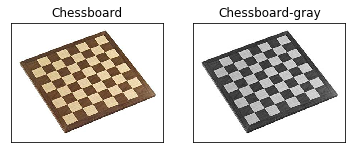

In [2]:
# Read chessboard image and diplay it
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_3.jpg'

img = cv2.imread(os.path.join(dir_,file_))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.subplot(122) , plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-gray')
plt.show()

Threshold -  10
NMS -  True
Neighborhood -  2
Number of keypoints with NMS -  2217
Number of keypoints without NMS -  5647


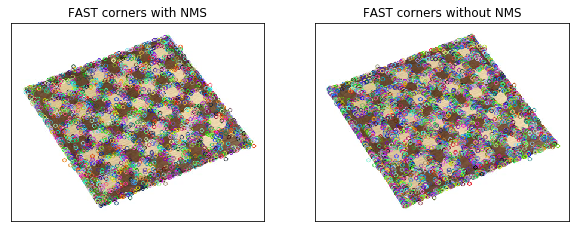

In [25]:
# Initiate FAST object with default constructor
fast = cv2.FastFeatureDetector_create()

# Print default parameters of fast detector object
print("Threshold - ",fast.getThreshold())
print("NMS - ",fast.getNonmaxSuppression())
print("Neighborhood - ",fast.getType())

# find keypoints and draw them over image
kp = fast.detect(img, None)
img_kp = cv2.drawKeypoints(img,kp,(0,0,255))
print('Number of keypoints with NMS - ',len(kp))

# keypoints with NMS disabled
fast.setNonmaxSuppression(0)
kp_nonms = fast.detect(img, None)
img_kp_nonms = cv2.drawKeypoints(img,kp_nonms,(0,0,255))
print('Number of keypoints without NMS - ',len(kp_nonms))

plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img_kp,"gray"), plt.xticks([]), plt.yticks([]), plt.title('FAST corners with NMS')
plt.subplot(122) , plt.imshow(img_kp_nonms,"gray"), plt.xticks([]), plt.yticks([]), \
plt.title('FAST corners without NMS')
plt.show()

### BRIEF (Binary Robust Independent Elementary Features)

### Ref
- [OpenCV Reference for BRIEF](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_brief/py_brief.html)

#### Notes
- Its *a feature descriptor method and doesn't provide a way to detect features in the first place*. Those have to be detected using methods like SIFT, SURF etc. BRIEF works best with **CenSurE** method which is fast and works better with BRIEF compared to the SURF points.
- BRIEF is a faster descriptor and matching algorithm given the keypoints/feature points.
- SIFT descriptors (128-dim) and SURF descriptors (64-dim) use floating point numbers, thus use 512-bytes and 256-bytes respectively.
- Thus for images with thousands of keypoints, memory consumption will be very high which is infeasible for embedded devices, and also increases time it takes for matching.
- But these can be compressed for matching using methods like **PCA, LDA**
- methods like *LSH (Location Sensitive Hashing)* can be used to convert floating-point numbers to binary strings, which can be matched using *Hamming distance* (*In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.* src - [Wikipedia](https://en.wikipedia.org/wiki/Hamming_distance))
- Hamming distance can be calculated using XOR and BITCNT operations, available in the ISA of $\mu C$ and CPUs (SSE instructions). But to get the binary string, we still need to calculate initial descriptors which doesn't solve the original problem of high memmory requirement.

*BRIEF usage*
- Provides way to compute binary strings without finding descriptors.
- It takes smoothened image patch and select set of $n_d$ location pairs $(p,q)$ in a unique way. Then intensity is compared, if $I_p < I_q$ then result is 1 else 0. This is applied to all the pairs to get $n_d$-dim bitstring.
- $n_d$ can be $128/256/512$. OpenCV by default uses 256 which in bytes has length of 32. Thus after calculating this, we use Hamming Distance to do matching of these descriptors.

In [27]:
# openCV demo
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

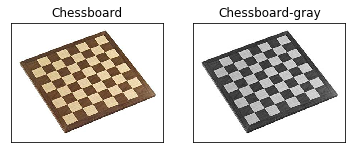

In [28]:
# Read chessboard image and diplay it
dir_ = '/home/cognitifai/Pictures/opencv/'
file_ = 'chessboard_3.jpg'

img = cv2.imread(os.path.join(dir_,file_))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard')
plt.subplot(122) , plt.imshow(img_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-gray')
plt.show()

In [34]:
# Create CenSurE detector object
detector = cv2.xfeatures2d_StarDetector()

# create BRIEF descriptor object
brief = cv2.xfeatures2d_BriefDescriptorExtractor()

# find keypoints using CenSurE detector
kp = detector.detect(img,None)

# compute descriptors from detected feature points
kp,des = brief.compute(img,kp)

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

### ORB (Oriented FAST and Rotated BRIEF)
#### Ref
- [OpenCV Reference for ORB](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html)
- [Kaggle Article](https://www.kaggle.com/wesamelshamy/tutorial-image-feature-extraction-and-matching)

#### Notes
- Its an efficient alternative for SIFT and SURF, interms of computation cost.
- Its roughly the fusion of FAST feature detector and BRIEF feature desciptor, with modifications to enhance the performance.
- It first finds keypoints using FAST detector, and then apply Harris corner measure to pick top $N$ points among them. 
- It also uses multi-scale feature to generate multi-scale results. but as FAST doesn't compute orientation, ORB has own method for rotational invariance.
- It considers a patch around the corner as center, and computes intensity weighted centroid of this patch. The direction of vector from corner-point to centroid gives orientation of that corner point.
- Moment are computed with $x$ and $y$ which are in circular region of radius $r$, to improve rotational invariance.
- As BRIEF descriptors are also not rotation-invariant, ORB generated 'steered' BRIEF.

 *-------------------------WIP--------------------------------*

### Feature matching
#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html)
- [OpenCV Reference with Homography](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)

#### Notes
- After generating features and their descriptor for 2 images, final step is to get matches/correspondence b/w features of 2 images.
- Broadly there are 2 approaches - (i) Brute-Force (BF) matching, and (ii) FLANN matching in OpenCV
- *BF matching* ->
    - Takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned.
    - OpenCV has `cv2.BFMatcher()` to create *BFMatcher* object which takes 2 optional parameters, `normType` (kind of distance measure to use - default `cv2.NORM_L2` and `cv2.NORM_L1` are good for SIFT/SURF; `cv2.NORM_HAMMING` and `cv2.NORM_HAMMING2` for binary string desciptors likeORB, BRIEF and BRISK ), and `crossCheck` (`False` by default. If `True` returns only those feature paris which match each-other, thus providing consistent results.)
    - After matching object creation, `BFMatcher.match()` (Returning the best match) and `BFMatcherknnMatch()` (Returning k best matches) are used to generate matches
    - `cv2.drawMatches()` and `cv2.drawMatchesKnn()` draws matches and k best matches respectively b/w 2 images for each keypoint.

- *FLANN (Fast Library for Approximate Nearest Neighbours) matcher* ->
    - It contains a collection of optimized algorithm for fast nearest neighbour search in large datasets and for high-dimension features. Thus works faster than BF matcher.

 *-------------------------WIP--------------------------------*

In [38]:
# BF Matching with ORB descriptor b/w query-image and train-image
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

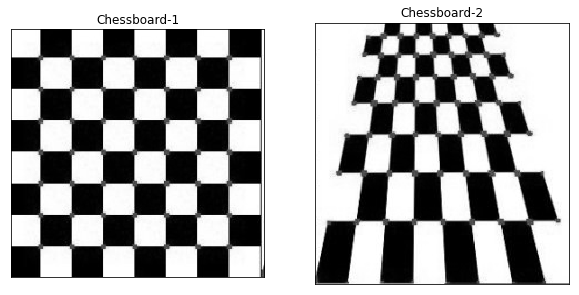

In [39]:
# Read chessboard images and diplay them
dir_ = '/home/cognitifai/Pictures/opencv/'
file1_ = 'chessboard_1.png'
file2_ = 'chessboard_2.png'

img1 = cv2.imread(os.path.join(dir_,file1_))
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(os.path.join(dir_,file2_))
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,15))
plt.subplot(121) , plt.imshow(img1_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-1')
plt.subplot(122) , plt.imshow(img2_gray,"gray"), plt.xticks([]), plt.yticks([]), plt.title('Chessboard-2')
plt.show()

In [47]:
# Create ORB detector-cum-descriptor object
orb = cv2.ORB_create()

# Find the keypoint and their descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

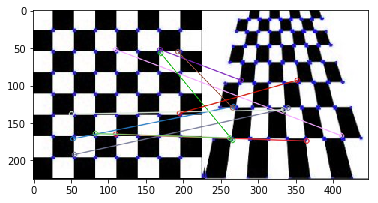

In [57]:
# Create BF Matcher object and use its match method
bfm = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)

# Find matches of descriptors in query image
matches = bfm.match(des1,des2)

# Sort matches in increasing order of distance (lower the distance, better is the match quality)
matches_asc = sorted(matches, key = lambda x:x.distance)

# Draw matches
img_match = None
img_match = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img_match, flags=2)

plt.imshow(img_match,"gray") ; plt.show()

### Feature matching with Hmography to find objects
#### Ref
- [OpenCV Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)

#### Notes
- Use Feature matching and findHomography to find known object in a complex image (Object Detection)
- In Feature Matching, we had an query image and training image (Complex one), in which we found the feature points and also determined best matches for the query image's feature points in the train-image.
- Thus we tried to map parts of an object in another complex image. This method can be used to find the object exactly in the trainImage.
- We can use `cv2.findHomography()` method with these corresponding/matched feature points b/w 2 images to get **perspective transformation** of that object. Then we can use `cv2.perspectiveTransform()` to find the object. We *need atleast 4 correct matching points to estimate the Homograpy transformation*.
- We can remove outliers of matching results using RANSAC or LEAST_MEDIAN algorithms (*parameters to findHomography*), to get good matches. 
- `cv2.findHomography()` returns a mask which specifies the inlier and outlier points.